In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, RadiusNeighborsClassifier
from sklearn.metrics import accuracy_score, confusion_matrix
from sklearn.preprocessing import StandardScaler
import time
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load iris dataset
iris = load_iris()
X = iris.data
y = iris.target

# Create a DataFrame
df = pd.DataFrame(X, columns=iris.feature_names)
df['Species'] = y

In [ ]:
df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


<Figure size 1000x800 with 0 Axes>

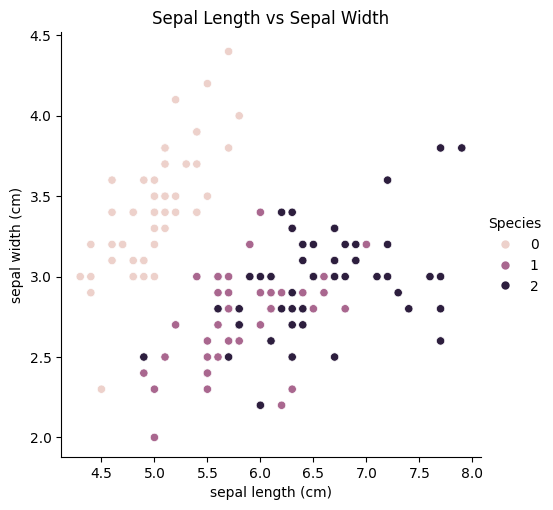

<Figure size 1000x800 with 0 Axes>

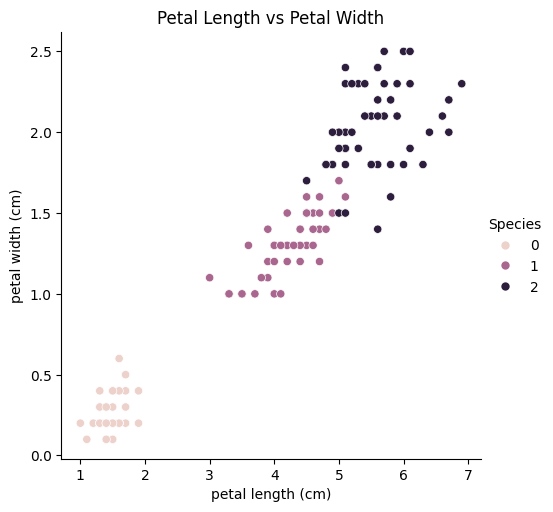

In [ ]:
# Plot sepal length vs sepal width using species as hue
plt.figure(figsize=(10,8))
sns.relplot(x="sepal length (cm)", y="sepal width (cm)", hue="Species", data=df)
plt.title("Sepal Length vs Sepal Width")
plt.show()

# Plot petal length vs petal width using species as hue
plt.figure(figsize=(10,8))
sns.relplot(x="petal length (cm)", y="petal width (cm)", hue="Species", data=df)
plt.title("Petal Length vs Petal Width")
plt.show()

In [ ]:
# Normalize the data for KNN
scaler = StandardScaler()
X_normalized = scaler.fit_transform(X)

# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=1)
X_train_normalized, X_test_normalized, y_train, y_test = train_test_split(X_normalized, y, test_size=0.2, random_state=1)

# Create a list to store the accuracy scores for KNN
knn_accuracy_scores = []

# Create a range of k values
k_values = range(1, 20)

# Loop through each k value
for k in k_values:
    # Create a KNN classifier with the current k value
    knn = KNeighborsClassifier(n_neighbors=k)
    
    # Train the model using the training sets
    start_time = time.time()
    knn.fit(X_train_normalized, y_train)
    end_time = time.time()
    execution_time = end_time - start_time
    
    # Predict the response for test dataset
    y_pred = knn.predict(X_test_normalized)
    
    # Calculate the accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    
    # Append the accuracy score to the list
    knn_accuracy_scores.append(accuracy)



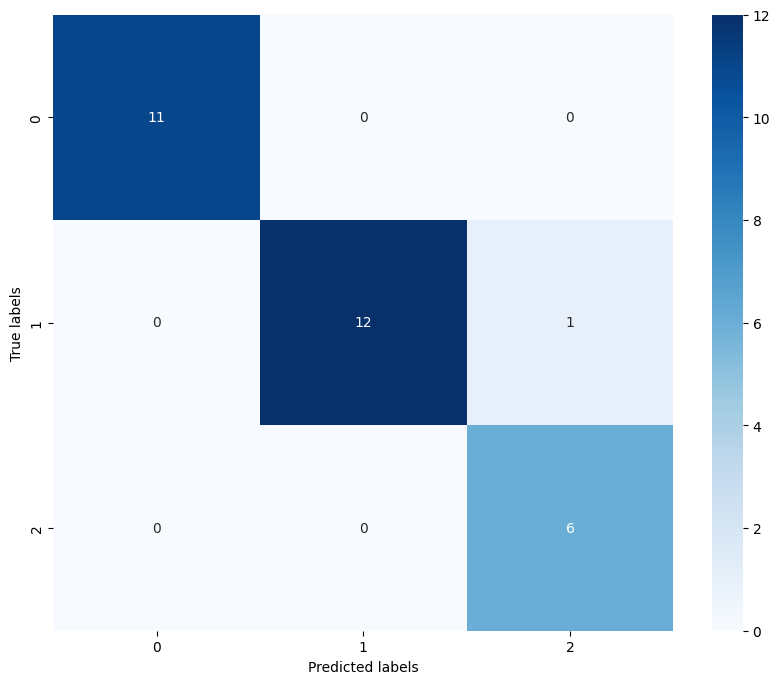

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using seaborn
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()

In [ ]:
# Create a list to store the accuracy scores for RNN
rnn_accuracy_scores = []

# Create a range of radius values
radius_values = range(1, 20)

# Loop through each radius value
for radius in radius_values:
    # Create a RNN classifier with the current radius value
    rnn = RadiusNeighborsClassifier(radius=radius)
    
    # Train the model using the training sets
    start_time = time.time()
    rnn.fit(X_train, y_train)
    end_time = time.time()
    execution_time = end_time - start_time
    
    # Predict the response for test dataset
    y_pred = rnn.predict(X_test)
    
    # Calculate the accuracy score
    accuracy = accuracy_score(y_test, y_pred)
    
    # Append the accuracy score to the list
    rnn_accuracy_scores.append(accuracy)

In [ ]:
# Compare the execution times
knn_execution_times = []
rnn_execution_times = []

for k in k_values:
    knn = KNeighborsClassifier(n_neighbors=k)
    start_time = time.time()
    knn.fit(X_train_normalized, y_train)
    end_time = time.time()
    execution_time = end_time - start_time
    knn_execution_times.append(execution_time)

for radius in radius_values:
    rnn = RadiusNeighborsClassifier(radius=radius)
    start_time = time.time()
    rnn.fit(X_train, y_train)
    end_time = time.time()
    execution_time = end_time - start_time
    rnn_execution_times.append(execution_time)

# Choose the best model based on execution time
if min(knn_execution_times) < min(rnn_execution_times):
    print("The best model is KNN with an execution time of", min(knn_execution_times), "seconds.")
else:
    print("The best model is RNN with an execution time of", min(rnn_execution_times), "seconds.")

The best model is RNN with an execution time of 0.0 seconds.


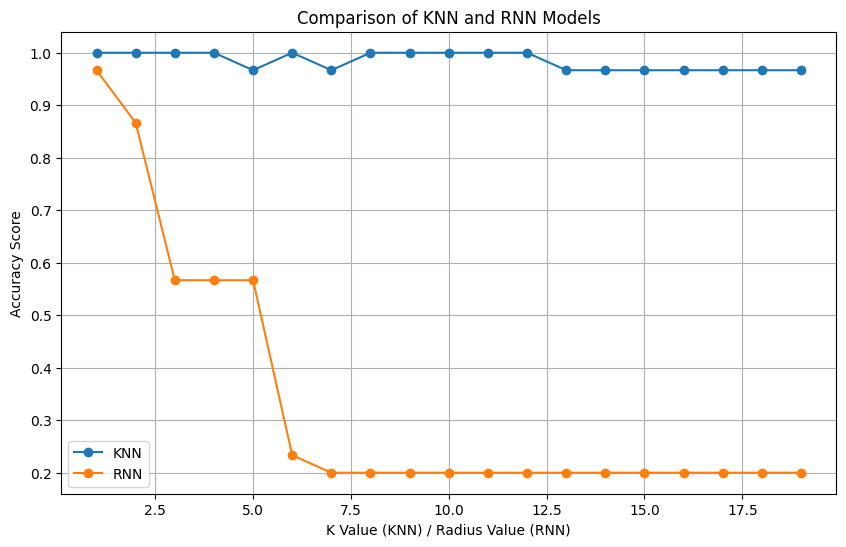

In [ ]:
# Create a plot to compare the two models
plt.figure(figsize=(10,6))
plt.plot(k_values, knn_accuracy_scores, marker='o', label='KNN')
plt.plot(radius_values, rnn_accuracy_scores, marker='o', label='RNN')
plt.title('Comparison of KNN and RNN Models')
plt.xlabel('K Value (KNN) / Radius Value (RNN)')
plt.ylabel('Accuracy Score')
plt.legend()
plt.grid(True)
plt.show()

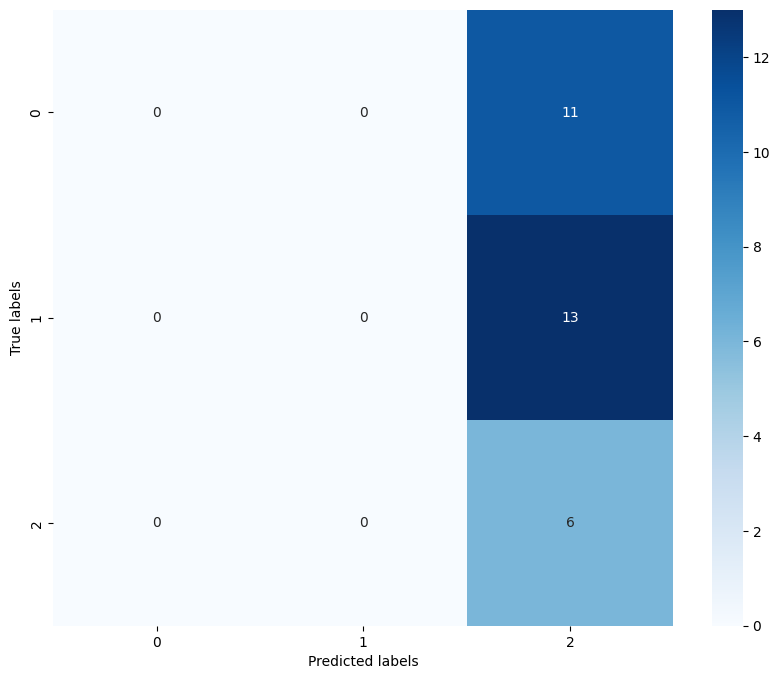

In [ ]:
# Calculate the confusion matrix
cm = confusion_matrix(y_test, y_pred)

# Display the confusion matrix using seaborn
plt.figure(figsize=(10,8))
sns.heatmap(cm, annot=True, cmap="Blues")
plt.xlabel("Predicted labels")
plt.ylabel("True labels")
plt.show()